In [5]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# data preparation
from sklearn.model_selection import train_test_split, StratifiedKFold

# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# utils
from itertools import chain
from sklearn.model_selection import GridSearchCV

In [6]:
# Kaggle
dataset1 = 'https://raw.githubusercontent.com/JuJu222/ESRB_Classification/main/dataset/Video_games_esrb_rating.csv'

# ESRB.org
dataset2 = 'https://raw.githubusercontent.com/JuJu222/ESRB_Classification/main/dataset/final_esrb.csv'

In [7]:
# df1 reads data from Kaggle dataset
df1 = pd.read_csv(dataset1)

# df2 reads data from ESRB dataset
df2 = pd.read_csv(dataset2)

In [8]:
df1.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [9]:
df2.head()

,web-scraper-order,web-scraper-start-url,games-href,title,platform,descriptors,rating
0,1669304193-3338,https://www.esrb.org/search/?searchKeyword=&pl...,https://www.esrb.org/ratings/1018/spiderman-ve...,Spiderman/Venom/ Separation Anxiety,"Windows PC, Sega 32X, Sega Genesis, Super Nint...",No Descriptors,Everyone
1,1669304196-3339,https://www.esrb.org/search/?searchKeyword=&pl...,https://www.esrb.org/ratings/322/the-11th-hour...,THE 11th Hour:The Sequel To The 7th Guest,"3DO, Atari Jaguar, Windows PC","Realistic Blood and Gore, Suggestive Themes",Mature 17+
2,1669304199-3340,https://www.esrb.org/search/?searchKeyword=&pl...,https://www.esrb.org/ratings/1831/assassin-2015/,Assassin 2015,Windows PC,"Animated Blood, Animated Violence",Mature 17+
3,1669304201-3341,https://www.esrb.org/search/?searchKeyword=&pl...,https://www.esrb.org/ratings/1739/indiana-jone...,Indiana Jones and the Fate of Atlantis,Windows PC,Animated Violence,Everyone
4,1669304204-3342,https://www.esrb.org/search/?searchKeyword=&pl...,https://www.esrb.org/ratings/1765/p-t-o-ii/,P.T.O. II,Windows PC,No Descriptors,Everyone


##### Preprocess 1st dataset

In [10]:
df1.loc[df1['console'] == 1, 'console'] = 'PlayStation 4,Xbox One'
df1.loc[df1['console'] == 0, 'console'] = 'PlayStation 4'
df1.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,"PlayStation 4,Xbox One",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,"PlayStation 4,Xbox One",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,"PlayStation 4,Xbox One",0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,PlayStation 4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,PlayStation 4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [11]:
df1['console'] = df1['console'].apply(lambda x: x.split(','))
df1.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,"[PlayStation 4, Xbox One]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,"[PlayStation 4, Xbox One]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,"[PlayStation 4, Xbox One]",0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,[PlayStation 4],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,[PlayStation 4],0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [12]:
temp_df1 = pd.DataFrame()
temp_df1['title'] = df1['title']
temp_df1 = temp_df1.join(df1['console'].str.join('|').str.get_dummies())
temp_df1[['Playstation 5', 'Xbox 360', 'Playstation 3']] = 0
temp_df1.head()

,title,PlayStation 4,Xbox One,Playstation 5,Xbox 360,Playstation 3
0,Monster Jam Steel Titans 2,1,1,0,0,0
1,Subnautica: Below Zero,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,1,1,0,0,0
3,Jamestown+,1,0,0,0,0
4,Neptunia Virtual Stars,1,0,0,0,0


In [13]:
new_df1 = df1.merge(temp_df1, on='title').drop(['console'], axis=1)
new_df1.rename(columns={'strong_janguage': 'strong_language'}, inplace=True)
new_df1.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,PlayStation 4,Xbox One,Playstation 5,Xbox 360,Playstation 3
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,1,1,0,0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,ET,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,1,0,0,0,M,1,1,0,0,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,ET,1,0,0,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,1,0,0,0,T,1,0,0,0,0


In [14]:
new_df1.columns = new_df1.columns.str.lower().str.replace(' ', '_')
new_df1.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,1,1,0,0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,ET,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,1,0,0,0,M,1,1,0,0,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,ET,1,0,0,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,1,0,0,0,T,1,0,0,0,0


In [15]:
column1 = new_df1.columns
column1

Index(['title', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating', 'playstation_4', 'xbox_one', 'playstation_5',
       'xbox_360', 'playstation_3'],
      dtype='object')

##### Preprocess 2nd dataset

In [16]:
df2.drop(['web-scraper-order', 'web-scraper-start-url', 'games-href'], axis=1, inplace=True)
df2.head()

,title,platform,descriptors,rating
0,Spiderman/Venom/ Separation Anxiety,"Windows PC, Sega 32X, Sega Genesis, Super Nint...",No Descriptors,Everyone
1,THE 11th Hour:The Sequel To The 7th Guest,"3DO, Atari Jaguar, Windows PC","Realistic Blood and Gore, Suggestive Themes",Mature 17+
2,Assassin 2015,Windows PC,"Animated Blood, Animated Violence",Mature 17+
3,Indiana Jones and the Fate of Atlantis,Windows PC,Animated Violence,Everyone
4,P.T.O. II,Windows PC,No Descriptors,Everyone


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        8720 non-null   object
 1   platform     8720 non-null   object
 2   descriptors  8713 non-null   object
 3   rating       8720 non-null   object
dtypes: object(4)
memory usage: 272.6+ KB


In [18]:
df2.isnull().sum()

title          0
platform       0
descriptors    7
rating         0
dtype: int64

In [19]:
df2.dropna(inplace=True)
df2.isnull().sum()

title          0
platform       0
descriptors    0
rating         0
dtype: int64

In [20]:
df2['platform'] = df2['platform'].apply(lambda x: [platform.strip() for platform in x.split(',')])
df2['descriptors'] = df2['descriptors'].apply(lambda x: x.split(','))
df2.head()

,title,platform,descriptors,rating
0,Spiderman/Venom/ Separation Anxiety,"[Windows PC, Sega 32X, Sega Genesis, Super Nin...",[No Descriptors],Everyone
1,THE 11th Hour:The Sequel To The 7th Guest,"[3DO, Atari Jaguar, Windows PC]","[Realistic Blood and Gore, Suggestive Themes]",Mature 17+
2,Assassin 2015,[Windows PC],"[Animated Blood, Animated Violence]",Mature 17+
3,Indiana Jones and the Fate of Atlantis,[Windows PC],[Animated Violence],Everyone
4,P.T.O. II,[Windows PC],[No Descriptors],Everyone


In [21]:
new_df2 = pd.DataFrame()

new_df2['title'] = df2['title']
new_df2 = new_df2.join(df2['platform'].str.join('|').str.get_dummies())
new_df2 = new_df2.join(df2['descriptors'].str.join('|').str.get_dummies())
new_df2.head()

,title,3DO,Atari Jaguar,CDI,Cable Box,Connected TV's,DVD,Dreamcast,Game Boy,Game Boy Advance,...,Strong Lyrics,Strong Sexual Content,Suggestive Themes,Tobacco Reference,Use of Alcohol,Use of Alcohol and Tobacco,Use of Drugs,Use of Tobacco,Violence,Violent References
0,Spiderman/Venom/ Separation Anxiety,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,THE 11th Hour:The Sequel To The 7th Guest,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Assassin 2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Indiana Jones and the Fate of Atlantis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P.T.O. II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
rating_dict = {
    'Adults Only 18+': 'A',
    'Everyone': 'E',
    'Everyone 10+': 'E 10+',
    'Mature 17+': 'M',
    'Teen': 'T'
}

new_df2['rating'] = df2['rating'].map(rating_dict)
new_df2.columns = new_df2.columns.str.lower().str.replace(' ', '_')
new_df2.columns = new_df2.columns.str.replace('^_', '', regex=True)
new_df2.rename(columns={'rating': 'esrb_rating'}, inplace=True)
new_df2['playstation_5'] = 0
new_df2.head()

,title,3do,atari_jaguar,cdi,cable_box,connected_tv's,dvd,dreamcast,game_boy,game_boy_advance,...,suggestive_themes,tobacco_reference,use_of_alcohol,use_of_alcohol_and_tobacco,use_of_drugs,use_of_tobacco,violence,violent_references,esrb_rating,playstation_5
0,Spiderman/Venom/ Separation Anxiety,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0
1,THE 11th Hour:The Sequel To The 7th Guest,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,0
2,Assassin 2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,0
3,Indiana Jones and the Fate of Atlantis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0
4,P.T.O. II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0


In [23]:
new_df2 = new_df2.loc[:, ~new_df2.columns.duplicated()]
new_df2.head()

,title,3do,atari_jaguar,cdi,cable_box,connected_tv's,dvd,dreamcast,game_boy,game_boy_advance,...,violence,violent_references,alcohol_reference,alcohol_and_tobacco_reference,animated_blood_and_gore,mild_animated_blood,no_descriptors,strong_lyrics,esrb_rating,playstation_5
0,Spiderman/Venom/ Separation Anxiety,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,E,0
1,THE 11th Hour:The Sequel To The 7th Guest,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,0
2,Assassin 2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,0
3,Indiana Jones and the Fate of Atlantis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0
4,P.T.O. II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,E,0


In [24]:
new_df1.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,1,1,0,0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,ET,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,1,0,0,0,M,1,1,0,0,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,ET,1,0,0,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,1,0,0,0,T,1,0,0,0,0


In [25]:
temp_df2 = new_df2.loc[:, column1]
temp_df2.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
0,Spiderman/Venom/ Separation Anxiety,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,0,0,0,0,0
1,THE 11th Hour:The Sequel To The 7th Guest,0,0,0,0,0,0,0,0,0,...,1,0,0,0,M,0,0,0,0,0
2,Assassin 2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,M,0,0,0,0,0
3,Indiana Jones and the Fate of Atlantis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,0,0,0,0,0
4,P.T.O. II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,E,0,0,0,0,0


##### Integrating 1st dataset and 2nd dataset

In [26]:
df = pd.concat([new_df1, temp_df2], ignore_index=True)
df = df.loc[df['no_descriptors'] == 0, :]
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,ET,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,1,0,0,0,M,1,1,0,0,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,ET,1,0,0,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,1,0,0,0,T,1,0,0,0,0
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,1,T,1,0,0,0,0


In [27]:
print('Total row from integrated data: {} with {} columns'.format(df.shape[0], df.shape[1]))

Total row from integrated data: 7174 with 38 columns


In [28]:
df.isnull().sum()

title                       0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_language             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_rating                 0
playstatio

In [29]:
df.drop_duplicates(['title'], inplace=True)
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,ET,1,1,0,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,1,0,0,0,M,1,1,0,0,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,ET,1,0,0,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,1,0,0,0,T,1,0,0,0,0
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,1,T,1,0,0,0,0


In [30]:
print('Total row after dropping duplicate title: {} with {} columns'.format(df.shape[0], df.shape[1]))

Total row after dropping duplicate title: 6897 with 38 columns


In [31]:
descriptors = df.iloc[:, 1:32]
descriptors.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
descriptor_count = descriptors.sum().sort_values(ascending=False)
descriptor_count

violence                    1164
suggestive_themes            512
strong_language              491
fantasy_violence             482
blood                        454
intense_violence             390
mild_language                361
language                     356
alcohol_reference            326
mild_violence                316
blood_and_gore               244
sexual_themes                238
mild_suggestive_themes       209
simulated_gambling           193
mild_blood                   178
crude_humor                  160
mild_lyrics                  144
mild_fantasy_violence        122
drug_reference               121
use_of_alcohol               119
strong_sexual_content        107
mild_cartoon_violence         91
sexual_content                76
partial_nudity                65
lyrics                        62
cartoon_violence              54
nudity                        41
use_of_drugs_and_alcohol      39
animated_blood                35
mature_humor                  33
no_descrip

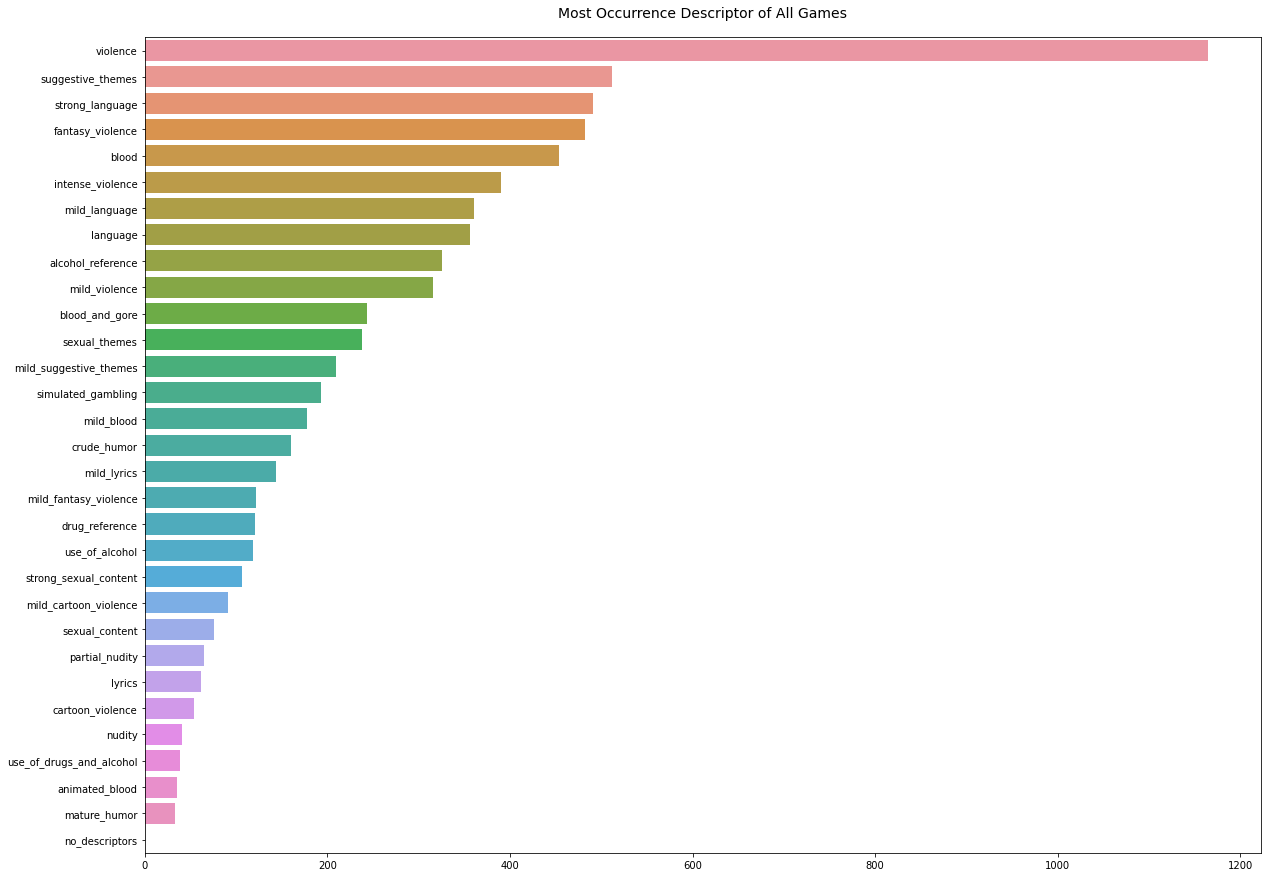

In [33]:
plt.figure(figsize=(20,15))
sns.barplot(x=descriptor_count.values, y=descriptor_count.index)
plt.title("Most Occurrence Descriptor of All Games", fontsize=14, pad=20)
plt.show()

In [34]:
violence_df = df.loc[df['violence'] == 1]
violence_df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,1,T,1,0,0,0,0
20,Asdivine Menace,0,0,0,0,0,0,0,1,0,...,1,0,0,1,T,1,0,0,0,0
26,Bugsnax,0,1,0,0,0,0,1,0,0,...,0,0,0,1,ET,1,0,0,0,0
46,Fortnite,0,0,0,0,0,0,0,0,0,...,0,0,0,1,T,1,1,0,0,0
47,Fortnite - The Last Laugh Bundle,0,0,0,0,0,0,0,0,0,...,0,0,0,1,T,1,1,0,0,0


In [35]:
violence_rating = violence_df['esrb_rating'].value_counts()
violence_rating

T        737
M        367
E         35
E 10+     18
ET         4
A          3
Name: esrb_rating, dtype: int64

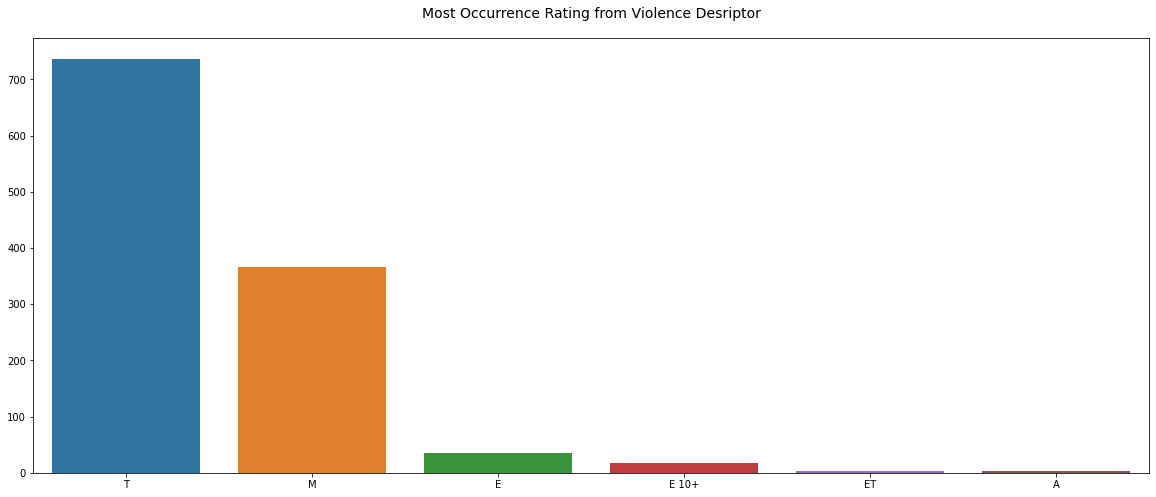

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(y=violence_rating.values, x=violence_rating.index)
plt.title("Most Occurrence Rating from Violence Desriptor", fontsize=14, pad=20)
plt.show()

In [37]:
violence_platform = violence_df.iloc[:, 33:].sum().sort_values(ascending=False)
violence_platform.head()

xbox_360         146
playstation_4    123
playstation_3     91
xbox_one          82
playstation_5      0
dtype: int64

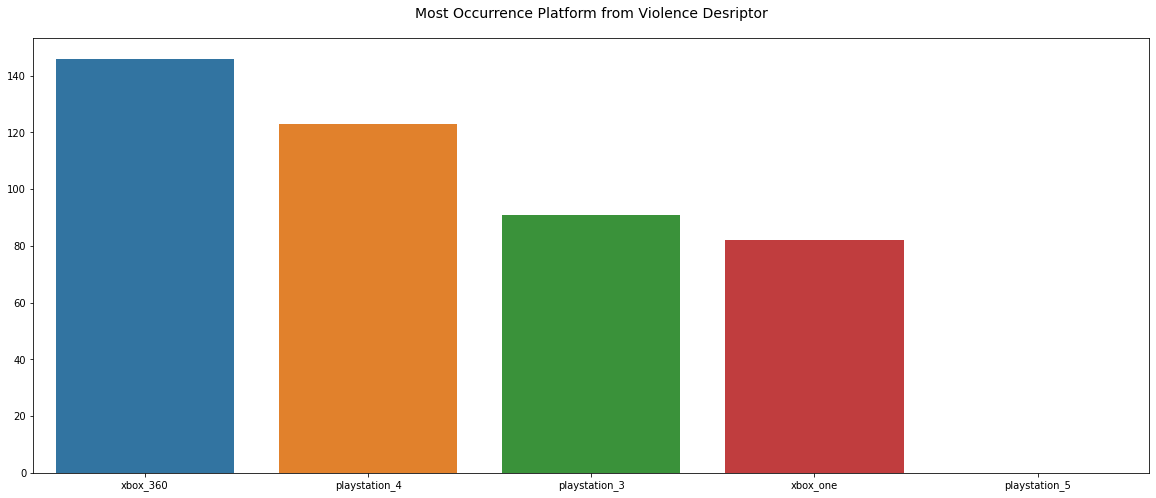

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(y=violence_platform.values, x=violence_platform.index)
plt.title("Most Occurrence Platform from Violence Desriptor", fontsize=14, pad=20)
plt.show()

In [39]:
platforms = df.iloc[:, 33:]
platforms.head()

,playstation_4,xbox_one,playstation_5,xbox_360,playstation_3
1,1,1,0,0,0
2,1,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
6,1,0,0,0,0


In [40]:
platform_count = platforms.sum().sort_values(ascending=False)
platform_count.head()

playstation_4    1582
xbox_one          820
xbox_360          405
playstation_3     281
playstation_5       0
dtype: int64

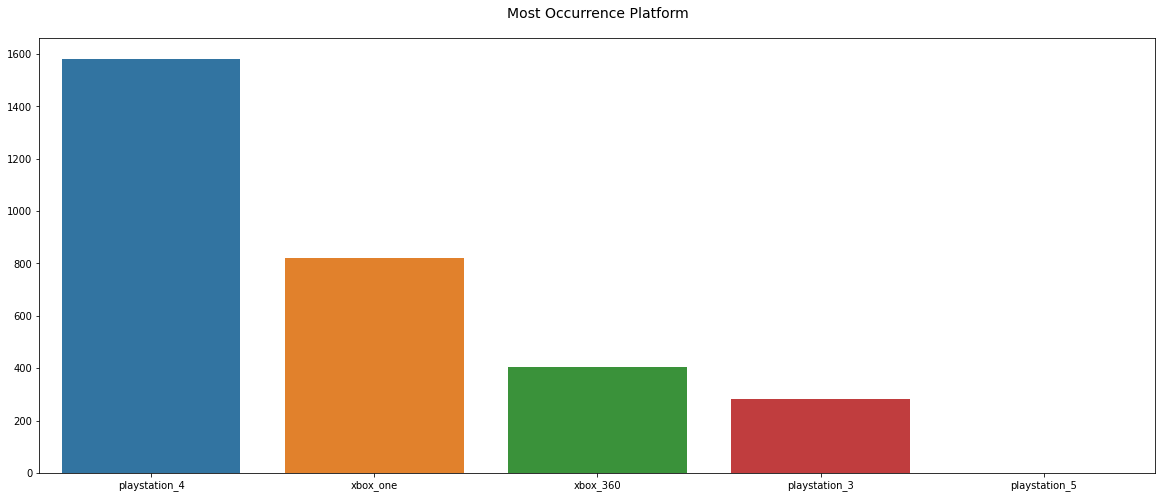

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(y=platform_count.values, x=platform_count.index)
plt.title("Most Occurrence Platform", fontsize=14, pad=20)
plt.show()

In [42]:
ratings = df.iloc[:, 32]
ratings.head()

1    ET
2     M
3    ET
4     T
6     T
Name: esrb_rating, dtype: object

In [43]:
rating_count = ratings.value_counts().sort_values(ascending=False)

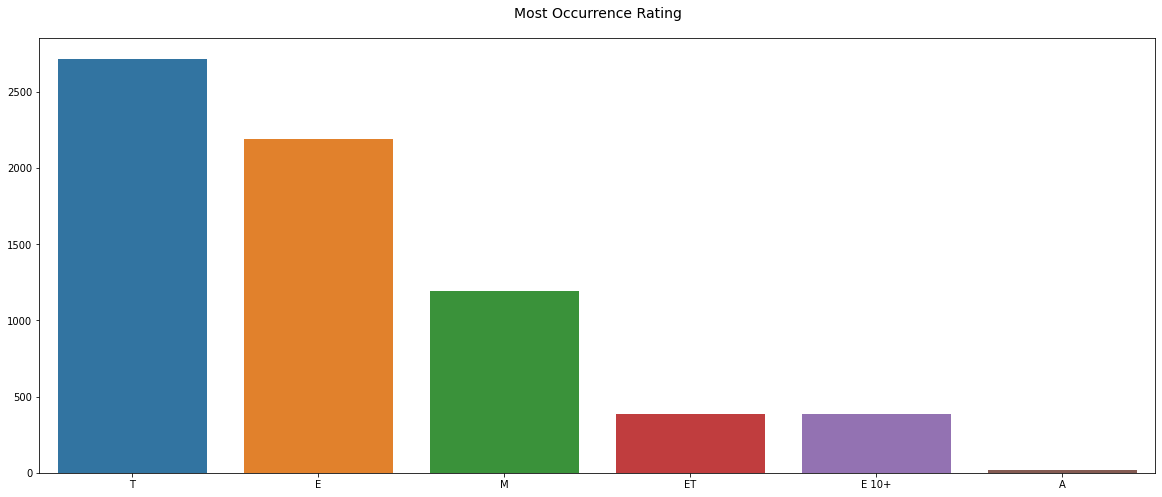

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(y=rating_count.values, x=rating_count.index)
plt.title("Most Occurrence Rating", fontsize=14, pad=20)
plt.show()

In [45]:
X = df.drop(['title', 'esrb_rating'], axis=1)
y = df.loc[:, 'esrb_rating']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

##### modeling

In [47]:
cv = StratifiedKFold(random_state=32, shuffle=True)

In [48]:
def train_step(model, param_grid, algo, fold, cv=cv):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=10)
    grid_search.fit(X_train, y_train)
    
    if algo == 'knn':
        model_ = KNeighborsClassifier(**grid_search.best_params_)
    elif algo == 'naive':
        model_ = MultinomialNB(**grid_search.best_params_)
    elif algo == 'svm':
        model_ = SVC(**grid_search.best_params_)
    elif algo == 'decision':
        model_ = DecisionTreeClassifier(**grid_search.best_params_)
    elif algo == 'random':
        model_ = RandomForestClassifier(**grid_search.best_params)
        
    model_.fit(X_train_temp, y_train_temp)
    return model_

In [49]:
model_metric = pd.DataFrame()

KNN train step
Fold 1
Temporary accuracy: 0.5173913043478261
Fold 2
Temporary accuracy: 0.6731884057971015
Fold 3
Temporary accuracy: 0.6540971718636693
Fold 4
Temporary accuracy: 0.6453952139231327
Fold 5
Temporary accuracy: 0.5105148658448151


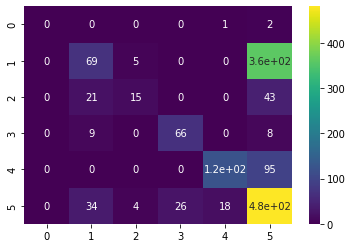

In [50]:
print('KNN train step')
for i, (train_index, val_index) in enumerate(cv.split(X, y)):
    print('Fold {}'.format(i+1))
    X_train_temp, X_val_temp = X.iloc[train_index], X.iloc[val_index]
    y_train_temp, y_val_temp = y.iloc[train_index], y.iloc[val_index]
    model = train_step(KNeighborsClassifier(), param_grid={'n_neighbors': range(1,31)}, fold=i, algo='knn')
    print('Temporary accuracy:', model.score(X_val_temp, y_val_temp))
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()
model_metric.loc['knn', 'accuracy'] = accuracy_score(y_test, yhat)
model_metric.loc['knn', 'precision'] = precision_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['knn', 'recall'] = recall_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['knn', 'f1-score'] = f1_score(y_test, yhat, average='weighted', zero_division=1)

Naive Bayes train step
Fold 1
Temporary accuracy: 0.5239130434782608
Fold 2
Temporary accuracy: 0.5304347826086957
Fold 3
Temporary accuracy: 0.5337200870195794
Fold 4
Temporary accuracy: 0.5402465554749819
Fold 5
Temporary accuracy: 0.49891225525743294


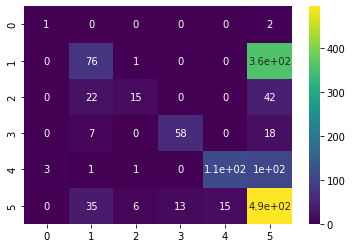

In [51]:
print('Naive Bayes train step')
for i, (train_index, val_index) in enumerate(cv.split(X, y)):
    print('Fold {}'.format(i+1))
    X_train_temp, X_val_temp = X.iloc[train_index], X.iloc[val_index]
    y_train_temp, y_val_temp = y.iloc[train_index], y.iloc[val_index]
    model = train_step(
        MultinomialNB(), 
        param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0], 'fit_prior': [True, False], 'class_prior': [None, [0.1,] * 6]}, 
        fold=i, 
        algo='naive'
    )
    print('Temporary accuracy:', model.score(X_val_temp, y_val_temp))
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()
model_metric.loc['naive_bayes', 'accuracy'] = accuracy_score(y_test, yhat)
model_metric.loc['naive_bayes', 'precision'] = precision_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['naive_bayes', 'recall'] = recall_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['naive_bayes', 'f1-score'] = f1_score(y_test, yhat, average='weighted', zero_division=1)

In [ ]:
print('SVM train step')
for i, (train_index, val_index) in enumerate(cv.split(X, y)):
    print('Fold {}'.format(i+1))
    X_train_temp, X_val_temp = X.iloc[train_index], X.iloc[val_index]
    y_train_temp, y_val_temp = y.iloc[train_index], y.iloc[val_index]
    model = train_step(
        SVC(), 
        param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
        fold=i, 
        algo='svm'
    )
    print('Temporary accuracy:', model.score(X_val_temp, y_val_temp))
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()
model_metric.loc['svc', 'accuracy'] = accuracy_score(y_test, yhat)
model_metric.loc['svc', 'precision'] = precision_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['svc', 'recall'] = recall_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['svc', 'f1-score'] = f1_score(y_test, yhat, average='weighted', zero_division=1)

SVM train step
Fold 1
Temporary accuracy: 0.6746376811594202
Fold 2
Temporary accuracy: 0.7079710144927536
Fold 3


In [ ]:
print('Decision Tree train step')
for i, (train_index, val_index) in enumerate(cv.split(X, y)):
    print('Fold {}'.format(i+1))
    X_train_temp, X_val_temp = X.iloc[train_index], X.iloc[val_index]
    y_train_temp, y_val_temp = y.iloc[train_index], y.iloc[val_index]
    model = train_step(
        DecisionTreeClassifier(), 
        param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}, 
        fold=i, 
        algo='decision'
    )
    print('Temporary accuracy:', model.score(X_val_temp, y_val_temp))
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()
model_metric.loc['decision_tree', 'accuracy'] = accuracy_score(y_test, yhat)
model_metric.loc['decision_tree', 'precision'] = precision_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['decision_tree', 'recall'] = recall_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['decision_tree', 'f1-score'] = f1_score(y_test, yhat, average='weighted', zero_division=1)

In [ ]:
print('Random Forest train step')
for i, (train_index, val_index) in enumerate(cv.split(X, y)):
    print('Fold {}'.format(i+1))
    X_train_temp, X_val_temp = X.iloc[train_index], X.iloc[val_index]
    y_train_temp, y_val_temp = y.iloc[train_index], y.iloc[val_index]
    model = train_step(
        RandomForestClassifier(), 
        param_grid={'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}, 
        fold=i, 
        algo='random'
    )
    print('Temporary accuracy:', model.score(X_val_temp, y_val_temp))
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()
model_metric.loc['random_forest', 'accuracy'] = accuracy_score(y_test, yhat)
model_metric.loc['random_forest', 'precision'] = precision_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['random_forest', 'recall'] = recall_score(y_test, yhat, average='weighted', zero_division=1)
model_metric.loc['random_forest', 'f1-score'] = f1_score(y_test, yhat, average='weighted', zero_division=1)

In [ ]:
model_metric